##### Importing libraries

In [1]:
import sqlite3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

##### Connecting SQL client

In [2]:
# database name. The database will be created in the same repo
database = "market_analysis"

# Connecting the database
client = sqlite3.connect(database=database)

##### Making dataframes of table data

In [3]:
produit = pd.read_sql(sql="SELECT * FROM produit", con=client)

magasins = pd.read_sql(sql="SELECT * FROM magasins", con=client)

vente = pd.read_sql(sql="SELECT * FROM vente", con=client)

##### Task 1 : Total sales earning

Grouping the `vente` dataframe by product reference

In [4]:
# Grouping data
vente_groupee_par_ref_produit = vente.groupby('ID Référence produit').sum()

# Sorting Index
vente_groupee_par_ref_produit.sort_index()

,index,Date,Quantité,ID Magasin
ID Référence produit,,,,
REF001,75,2023-05-272023-06-012023-06-062023-06-112023-0...,24,21
REF002,81,2023-05-282023-06-022023-06-072023-06-122023-0...,27,18
REF003,87,2023-05-292023-06-032023-06-082023-06-132023-0...,15,19
REF004,93,2023-05-302023-06-042023-06-092023-06-142023-0...,21,20
REF005,99,2023-05-312023-06-052023-06-102023-06-152023-0...,35,25


Setting index of `produit` dataframe

In [5]:
# Setting index
produit_reindexe = produit.set_index("ID Référence produit")

# Sorting index
produit_reindexe.sort_index()

,index,Nom,Prix,Stock
ID Référence produit,,,,
REF001,0,Produit A,49.99,100
REF002,1,Produit B,19.99,50
REF003,2,Produit C,29.99,75
REF004,3,Produit D,79.99,120
REF005,4,Produit E,39.99,80


Since both indices are same, we can multiply and add the `Quantité` column of `vente_groupee_par_ref_produit` dataframe and `Prix` column of `produit_reindexe` dataframe

In [6]:
# Multiplying quantity with the price per unit
total_sales_par_produit=vente_groupee_par_ref_produit["Quantité"]*produit_reindexe["Prix"]

# Displaying result of total sales per product
total_sales_par_produit

ID Référence produit
REF001    1199.76
REF002     539.73
REF003     449.85
REF004    1679.79
REF005    1399.65
dtype: float64

To get the total sales for all the products, we will do sum of `total_sales_par_produit`

In [7]:
# Summing up sales of all products
total_sales=total_sales_par_produit.sum()

# Displaying the result
print("and the total sales is {}€".format(total_sales))

and the total sales is 5268.78€


##### Task 2: The sales per product

It is the dataframe `total_sales_par_produit`, which is recalled below

In [8]:
# Recalling the dataframe
total_sales_par_produit

ID Référence produit
REF001    1199.76
REF002     539.73
REF003     449.85
REF004    1679.79
REF005    1399.65
dtype: float64

The graph below shows that the product having reference `REF004` earned most revenue among all the product sales

<Axes: xlabel='ID Référence produit'>

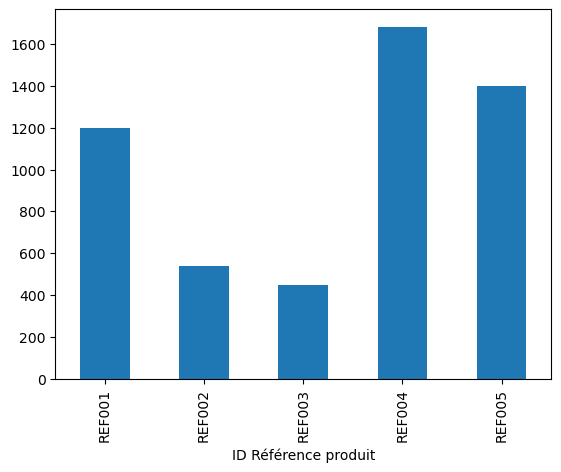

In [9]:
# Plotting the data in the form of bars
total_sales_par_produit.plot.bar()

##### Task 3 : The sales per region

Fist, we populate a new column `Prix` in `vente` dataframe with the prices per unit fetched from `produit_reindexe` dataframe with respect to each product reference in the list above

In [10]:
# New column name
prix = "Prix"

# Populating new column with null values
vente[prix] = np.NaN

# iterating over vente dataframe
for idx1 in vente.index:

    # iterating over the produit_reindexe dataframe
    for idx2 in produit_reindexe.index:

        # Getting value of product reference at said index
        vente_element = str(vente.loc[idx1,"ID Référence produit"])

        # if the fetched element matches with the index of produit_reindexe
        if vente_element == idx2:
            
            # Copy the value of respective price in the vente column
            vente.loc[idx1,prix]=produit_reindexe.loc[idx2,prix]

# Display the top 5 rows
vente.head()

,index,Date,ID Référence produit,Quantité,ID Magasin,Prix
0,0,2023-05-27,REF001,5,1,49.99
1,1,2023-05-28,REF002,3,2,19.99
2,2,2023-05-29,REF003,2,1,29.99
3,3,2023-05-30,REF004,4,3,79.99
4,4,2023-05-31,REF005,7,2,39.99


To get total sales of each product on each day, we multiply the quantity with the per unit price

In [11]:
# multiplying quantity with per unit price
vente["vente_totale"] = vente["Quantité"]*vente["Prix"]

# Display the top 5 rows
vente.head()

,index,Date,ID Référence produit,Quantité,ID Magasin,Prix,vente_totale
0,0,2023-05-27,REF001,5,1,49.99,249.95
1,1,2023-05-28,REF002,3,2,19.99,59.97
2,2,2023-05-29,REF003,2,1,29.99,59.98
3,3,2023-05-30,REF004,4,3,79.99,319.96
4,4,2023-05-31,REF005,7,2,39.99,279.93


Now we groupby and sum up the sales with respect to each shop

In [12]:
# Summing up the sales in vente_totale column with respect to shop ID
vente_groupee_par_magasin = vente.groupby("ID Magasin").sum()

# Sorting Indecx
vente_groupee_par_magasin.sort_index()

# Filtering the columns
vente_groupee_par_magasin = vente_groupee_par_magasin[["Quantité","Prix","vente_totale"]]

# Displaying the dataframe
vente_groupee_par_magasin

,Quantité,Prix,vente_totale
ID Magasin,,,
1,20,259.94,799.80
2,27,229.94,1009.73
3,21,269.95,1059.79
4,19,179.96,829.81
5,7,99.97,249.93
6,17,129.97,739.83
7,11,149.97,579.89


To make it readable, we will add the shop location in front of each shop ID

In [13]:
# New column name
ville = "Ville"

# Populating new column with null values
vente_groupee_par_magasin[ville] = np.NaN

# iterating over vente_groupee_par_magasin dataframe
for idx1 in vente_groupee_par_magasin.index:

    # iterating over magasins dataframe
    for idx2 in magasins.index:

        # Getting value of shop ID at said index
        magasins_element = int(magasins.loc[idx2,"ID Magasin"])

        # if the index of vente_groupee_par_magasin matches with the magasins_element
        if idx1 == magasins_element:
            
            # Copy the value of respective shop location in the vente column
            vente_groupee_par_magasin.loc[idx1,ville]=magasins.loc[idx2,ville]

# Displaying dataframe
vente_groupee_par_magasin

,Quantité,Prix,vente_totale,Ville
ID Magasin,,,,
1,20,259.94,799.80,Paris
2,27,229.94,1009.73,Marseille
3,21,269.95,1059.79,Lyon
4,19,179.96,829.81,Bordeaux
5,7,99.97,249.93,Lille
6,17,129.97,739.83,Nantes
7,11,149.97,579.89,Strasbourg


From the graph below, we can see that maximum sales occured in the city of Lyon

<Axes: xlabel='Ville'>

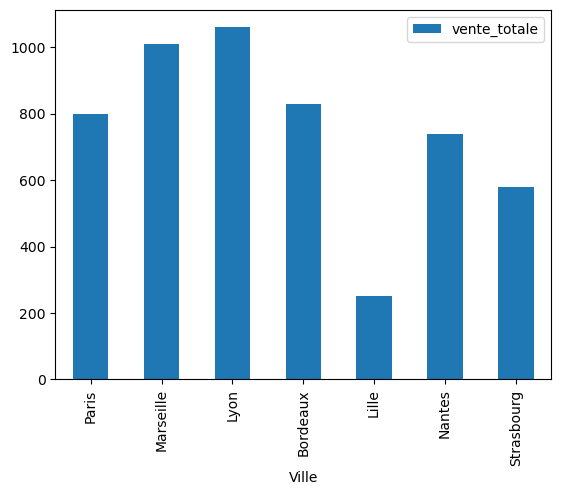

In [14]:
# Filtering the columns
ville_et_vente_totale = vente_groupee_par_magasin[["Ville", "vente_totale"]]

# Setting the index
ville_et_vente_totale.set_index("Ville", inplace=True)

# Plotting the results
ville_et_vente_totale.plot.bar()